<a href="https://colab.research.google.com/github/Smagali/Tps/blob/main/PAMI_PP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LA LIBERTAD DE ELEGIR**

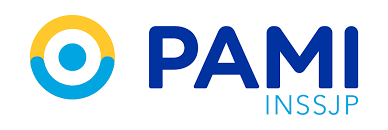

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels
from patsy import dmatrices
from charset_normalizer import detect
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

filepath1= "/content/drive/MyDrive/2024/1sem_2022.xls.csv"
filepath2 = "/content/drive/MyDrive/2024/1sem_2024.xls.csv"
filepath3 = "/content/drive/MyDrive/2024/dim_practica.csv"

with open(filepath1, 'rb') as f:
    result = detect(f.read())
    print(result['encoding'])

with open(filepath2, 'rb') as g:
    result2 = detect(g.read())
    print(result2['encoding'])

with open(filepath3, 'rb') as g:
    result3 = detect(g.read())
    print(result3['encoding'])

Mounted at /content/drive
windows-1250
windows-1250
ascii


In [2]:
data_2022 = pd.read_csv(filepath1, encoding=result['encoding'])
data_2024 = pd.read_csv(filepath2, encoding=result2['encoding'])
dim = pd.read_csv(filepath3, encoding=result3['encoding'])

data_2024.columns = data_2022.columns
data_2024 = data_2024[1:]

append_data = pd.concat([data_2022, data_2024], ignore_index=True)

append_data = pd.merge(append_data, dim, how='inner', left_on='PRACTICA', right_on='ID_PRACTICA')
append_data['PRACTICA'] = append_data['PRACTICA'].astype(str).str.cat(append_data['DESC_PRACTICA'].astype(str), sep=' - ')

num_Data = len(data_2022)
num_Data2 = len(data_2024)
num_total = len(append_data)
print(f"Número de registros 2022: {num_Data}")
print(f"Número de registros 2024: {num_Data2}")
print(f"Número de registros totales: {num_total}")

#Lectura de campo "FECHA_TURNO" de tipo cadena de texto para convertir en datetime
append_data['FECHA_TURNO'] = append_data['FECHA_TURNO'].astype(str)

append_data['FECHA_TURNO'] = append_data['FECHA_TURNO'].str.slice(0, 10) #Se corta en 10 caracteres que son de la fecha (00-00-0000)
append_data['FECHA_TURNO'] = pd.to_datetime(append_data['FECHA_TURNO'], format='%d/%m/%Y', dayfirst=True)

# Filtro de primera consulta 2022
fecha_inicio1 = pd.to_datetime('01/09/2022', dayfirst=True, format='%d/%m/%Y')
fecha_fin1 = pd.to_datetime('31/03/2023', dayfirst=True, format='%d/%m/%Y')

filtro1 = (
    append_data['PRACTICA'].str.contains('429001', na=False) &
    (append_data['FECHA_TURNO'] >= fecha_inicio1) &
    (append_data['FECHA_TURNO'] <= fecha_fin1)
)

primera_consulta1 = append_data[filtro1]

# Filtro de primera consulta 2024
fecha_inicio2 = pd.to_datetime('01/01/2024', dayfirst=True, format='%d/%m/%Y')
fecha_fin2 = pd.to_datetime('30/06/2024', dayfirst=True, format='%d/%m/%Y')

filtro2 = (
    append_data['PRACTICA'].str.contains('429001', na=False) &
    (append_data['FECHA_TURNO'] >= fecha_inicio2) &
    (append_data['FECHA_TURNO'] <= fecha_fin2)
)

primera_consulta2 = append_data[filtro2]


primera_consulta1.head()
primera_consulta2.head()
append_data.head()

Número de registros 2022: 7889
Número de registros 2024: 12989
Número de registros totales: 20878


,N_ORDEN,FECHA_EMISION,NRO_BENEFICIO,APELLIDO_NOMBRE,PRACTICA,FECHA_TURNO,US_ACEPTO,FECHA_ACEPTO,TRANSMITIDA,F_TRANSMISION,USUARIO_TRANSMITIO,VALIDADA,F_VALIDACION,USUARIO_VALIDO,ID_PRACTICA,DESC_PRACTICA
0,3322806124351,24/11/2022,15024832630600,ZELADA HILDA OTILIA,429001 - PRIMERA CONSULTA OFTALMOLOGICA,2023-02-01,UP20118242638,29/11/2022,S,22/02/2023,UP20118242638,S,02/02/2023 11:58,UP20118242638,429001,PRIMERA CONSULTA OFTALMOLOGICA
1,3322812657362,30/11/2022,15077414320700,CARRIZO JUAN CARLOS,429002 - CONSULTA DE SEGUIMIENTO OFTALMOLOGICO,2023-02-01,UP20118242638,30/11/2022,S,22/02/2023,UP20118242638,S,02/02/2023 09:40,UP20118242638,429002,CONSULTA DE SEGUIMIENTO OFTALMOLOGICO
2,3323851941702,07/01/2023,15054956450801,CAMPOS DOMINGA LEONOR,429002 - CONSULTA DE SEGUIMIENTO OFTALMOLOGICO,2023-03-01,UP20118242638,01/03/2023,S,16/03/2023,UP20118242638,S,01/03/2023 08:55,UP20118242638,429002,CONSULTA DE SEGUIMIENTO OFTALMOLOGICO
3,3323859797530,14/01/2023,15053178840200,CORONEL MODESTO MACEDONIO,429001 - PRIMERA CONSULTA OFTALMOLOGICA,2023-03-01,UP20118242638,16/01/2023,S,16/03/2023,UP20118242638,S,01/03/2023 13:51,UP20118242638,429001,PRIMERA CONSULTA OFTALMOLOGICA
4,3322835539119,21/12/2022,15064095600200,ROJAS SALDIAS SUSANA,429001 - PRIMERA CONSULTA OFTALMOLOGICA,2023-03-01,UP20118242638,13/01/2023,S,16/03/2023,UP20118242638,S,01/03/2023 13:48,UP20118242638,429001,PRIMERA CONSULTA OFTALMOLOGICA


Conteos totales de "primera vez" tanto en primer semestre del programa como primer semestre 2024

In [3]:
#Conteo total de primera vez#

conteo_Primeravez1 = primera_consulta1['PRACTICA'].count()
conteo_Primeravez2 = primera_consulta2['PRACTICA'].count()

print(f"Número de consultas de primera vez en primer semetre 2022: {conteo_Primeravez1}")
print(f"Número de consultas de primera vez en primer semestre 2024: {conteo_Primeravez2}")



Número de consultas de primera vez en primer semetre 2022: 1771
Número de consultas de primera vez en primer semestre 2024: 1720


# **Conteo de primeras consultas por fecha con su respectivo gráfico**

---
Primer semestre del programa

FECHA_TURNO
2022-09-01     1
2022-09-02    12
2022-09-05    12
2022-09-06    12
2022-09-07    11
              ..
2023-03-27    29
2023-03-28    25
2023-03-29    14
2023-03-30     6
2023-03-31    19
Name: count, Length: 139, dtype: int64


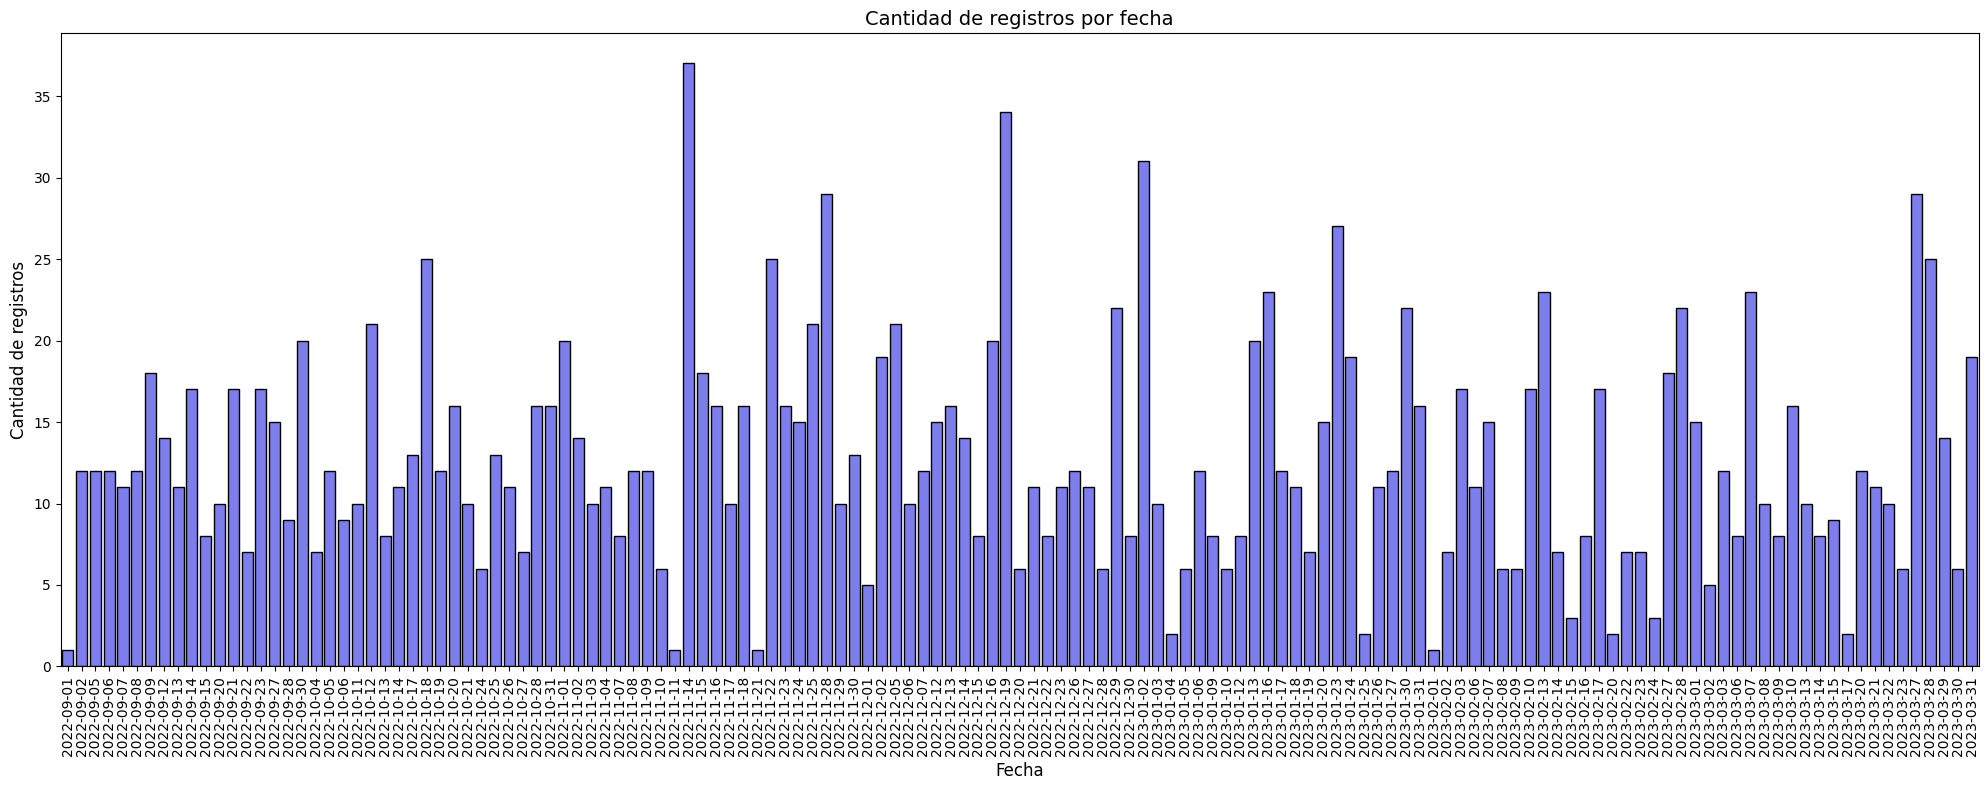

In [4]:

conteo_por_fecha = primera_consulta1['FECHA_TURNO'].value_counts().sort_index()
print(conteo_por_fecha)


plt.figure(figsize=(20, 8))
sns.barplot(x=conteo_por_fecha.index, y=conteo_por_fecha.values, color='#6a6aff', edgecolor='black'  )


plt.title('Cantidad de registros por fecha', fontsize=14)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Cantidad de registros', fontsize=12)
plt.xticks(rotation=90)


plt.tight_layout()
plt.show()

# **Conteo de primeras consultas por fecha con su respectivo gráfico**

---
Primer semestre 2024

FECHA_TURNO
2024-01-02     6
2024-01-04     9
2024-01-05    20
2024-01-08     6
2024-01-09    15
              ..
2024-06-18     8
2024-06-24    22
2024-06-25     9
2024-06-27    12
2024-06-28    13
Name: count, Length: 106, dtype: int64


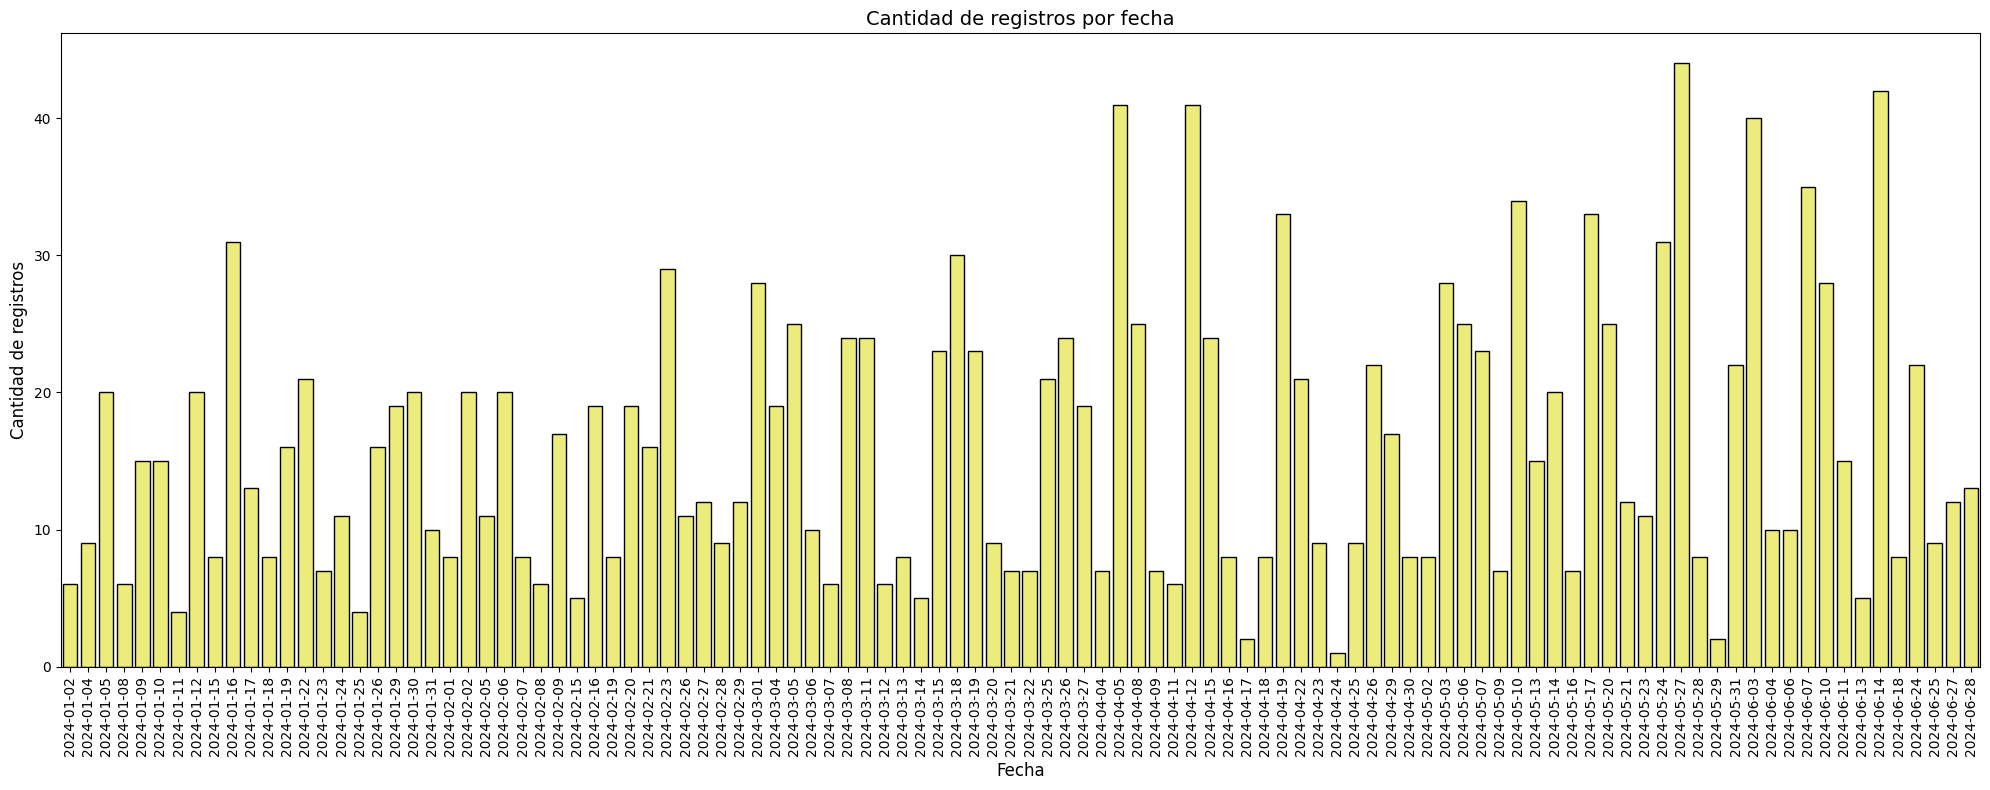

In [5]:

conteo_por_fecha2 = primera_consulta2['FECHA_TURNO'].value_counts().sort_index()
print(conteo_por_fecha2)


plt.figure(figsize=(20, 8))
sns.barplot(x=conteo_por_fecha2.index, y=conteo_por_fecha2.values, color='#ffff6a', edgecolor='black'  )


plt.title('Cantidad de registros por fecha', fontsize=14)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Cantidad de registros', fontsize=12)
plt.xticks(rotation=90)


plt.tight_layout()
plt.show()

Conteo de consultas de guardia segun períodos estudiados

In [6]:
# Filtro consultas de guardia
fecha_inicio = '01/09/2022'
fecha_fin = '31/03/2023'
fecha_inicio2 = '01/01/2024'
fecha_fin2 = '30/06/2024'


filtro_guardia1 = (append_data['PRACTICA'].str.contains('429003')) & (append_data['FECHA_TURNO'] >= fecha_inicio) & (append_data['FECHA_TURNO'] <= fecha_fin)

consulta_guardia1 = append_data[filtro_guardia1]

filtro_guardia2= (append_data['PRACTICA'].str.contains('429003')) & (append_data['FECHA_TURNO'] >= fecha_inicio2) & (append_data['FECHA_TURNO'] <= fecha_fin2)

consulta_guardia2 = append_data[filtro_guardia2]


#consulta_guardia1.head()#
conteo_guardia1 = consulta_guardia1['PRACTICA'].count()
conteo_guardia2 = consulta_guardia2['PRACTICA'].count()

print(f"Cantidad de guardias de Primer Semestre 2023: {conteo_guardia1}")
print(f"Cantidad de guardias de Primer Semestre 2024: {conteo_guardia2}")


Cantidad de guardias de Primer Semestre 2023: 275
Cantidad de guardias de Primer Semestre 2024: 105


# **Distribución de "Guardias" graficadas según semestre**

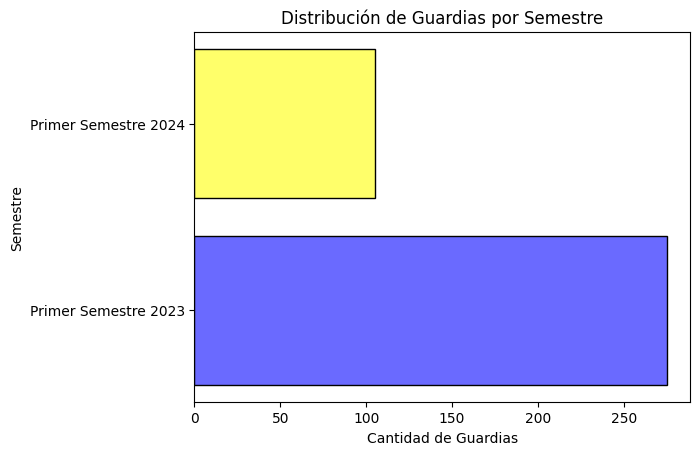

In [7]:
etiquetas = ['Primer Semestre 2023', 'Primer Semestre 2024']
conteos = [conteo_guardia1, conteo_guardia2]

plt.barh(etiquetas, conteos, color=['#6a6aff', '#ffff6a'], edgecolor='black')

plt.title('Distribución de Guardias por Semestre')
plt.xlabel('Cantidad de Guardias')
plt.ylabel('Semestre')


plt.show()

# **Representación gráfica de "Guardias" dentro de conteo de Prácticas totales según primer período analizado**

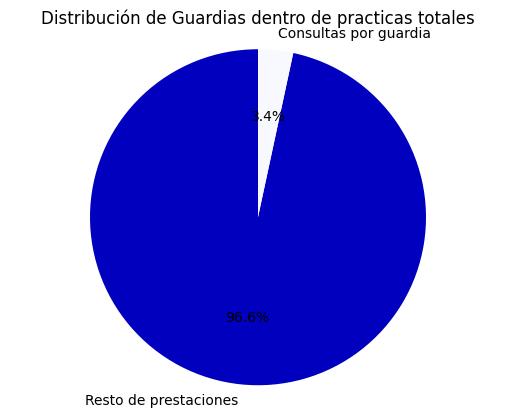

In [8]:
conteo_por_practica1 = len(data_2022['PRACTICA'])

Guardias_filtro1 = (data_2022['PRACTICA'].astype(str).str.contains('429003'))
Guardias_filtro1 = data_2022[Guardias_filtro1]
Conteo_guardias1 = len(Guardias_filtro1)

etiquetas = ['Resto de prestaciones', 'Consultas por guardia']
conteos = [conteo_por_practica1, Conteo_guardias1]

#Gráfico
plt.pie(conteos, labels=etiquetas, autopct='%1.1f%%', startangle=90, colors=['#0000be', '#f8f8ff'])

plt.axis('equal')

plt.title('Distribución de Guardias dentro de practicas totales')


plt.show()


# **Representación gráfica de "Guardias" dentro de conteo de Prácticas totales según segundo período analizado**

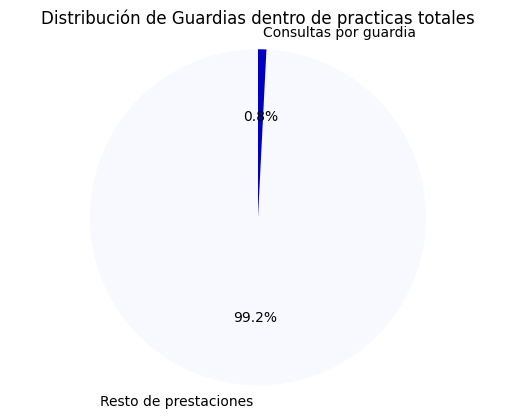

In [9]:
conteo_por_practica2 = len(data_2024['PRACTICA'])

Guardias_filtro2 = (data_2024['PRACTICA'].astype(str).str.contains('429003'))
Guardias_filtro2 = data_2024[Guardias_filtro2]
Conteo_guardias2 = len(Guardias_filtro2)

etiquetas = ['Resto de prestaciones', 'Consultas por guardia']
conteos = [conteo_por_practica2, Conteo_guardias2]


plt.pie(conteos, labels=etiquetas, autopct='%1.1f%%', startangle=90, colors=['#f8f8ff', '#0000be'])

plt.axis('equal')

plt.title('Distribución de Guardias dentro de practicas totales')


plt.show()

Cantidad de prácticas quirúrgicas totales por período

In [10]:
# Filtro prácticas quirúrgicas
fecha_inicio = '01/09/2022'
fecha_fin = '31/03/2023'


cx_filtro1 = (append_data['PRACTICA'].str.contains('500038|500039')) & (append_data['FECHA_TURNO'] >= fecha_inicio) & (append_data['FECHA_TURNO'] <= fecha_fin)
cx1 = append_data[cx_filtro1]


fecha_inicio2 = '01/01/2024'
fecha_fin2 = '30/06/2024'


cx_filtro2 = (append_data['PRACTICA'].str.contains('500038|500039')) & (append_data['FECHA_TURNO'] >= fecha_inicio2) & (append_data['FECHA_TURNO'] <= fecha_fin2)
cx2 = append_data[cx_filtro2]

conteo_practica_cx1 = cx1['PRACTICA'].count()
conteo_practica_cx2 = cx2['PRACTICA'].count()
print(f"Cantidad de cirugías realizadas en período 01-09-2022 / 20-03-2023: {conteo_practica_cx1}")
print(f"Cantidad de cirugías realizadas en período 01-01-2024 / 30-06-2024: {conteo_practica_cx2}")


Cantidad de cirugías realizadas en período 01-09-2022 / 20-03-2023: 472
Cantidad de cirugías realizadas en período 01-01-2024 / 30-06-2024: 692


#**Representación de filtros dentro de prácticas totales graficados según período**

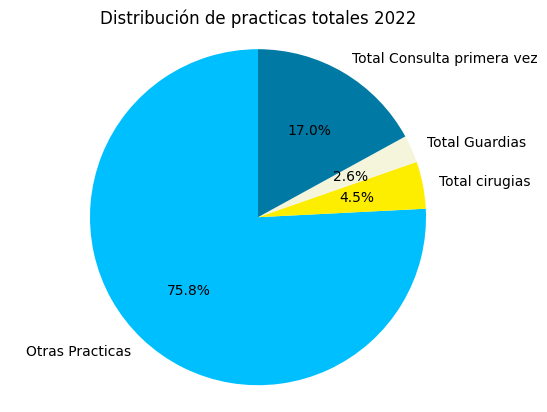

In [11]:
etiquetas = ['Otras Practicas', 'Total cirugias', 'Total Guardias', 'Total Consulta primera vez']
conteos = [conteo_por_practica1, conteo_practica_cx1, Conteo_guardias1, conteo_Primeravez1]  # Conteos


plt.pie(conteos, labels=etiquetas, autopct='%1.1f%%', startangle=90, colors=['#00bfff', '#fdee00', '#f5f5dc', '#007aa5'])


plt.axis('equal')


plt.title('Distribución de practicas totales 2022')




plt.show()

#**Representación de filtros dentro de prácticas totales graficados según período**

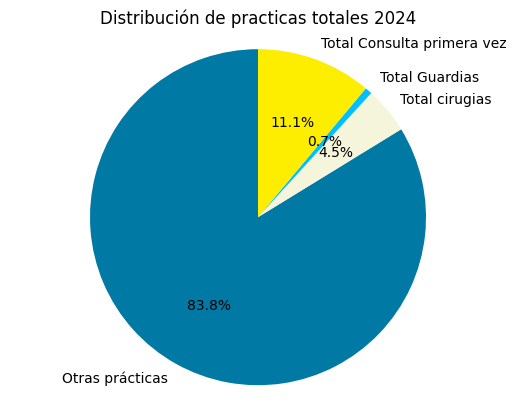

In [12]:
etiquetas = ['Otras prácticas', 'Total cirugias', 'Total Guardias', 'Total Consulta primera vez']
conteos = [conteo_por_practica2, conteo_practica_cx2, Conteo_guardias2, conteo_Primeravez2]


plt.pie(conteos, labels=etiquetas, autopct='%1.1f%%', startangle=90, colors=['#007aa5', '#f5f5dc', '#00bfff', '#fdee00'])


plt.axis('equal')


plt.title('Distribución de practicas totales 2024')




plt.show()

Conteo total de cada práctica realizada según período correspondiente

In [13]:
conteo_2022 = pd.DataFrame(data_2022)
conteo_por_practica_groupby = conteo_2022.groupby('PRACTICA').size()

conteo_2024 = pd.DataFrame(data_2024)
conteo_por_practica_groupby2 = conteo_2024.groupby('PRACTICA').size()

print(f"Conteo por práctica agrupado según período 01-09-2022 / 20-03-2023: {conteo_por_practica_groupby}")
print(f"Conteo por práctica agrupado según período 01-01-2024 / 30-06-2024: {conteo_por_practica_groupby2}")


Conteo por práctica agrupado según período 01-09-2022 / 20-03-2023: PRACTICA
429001    1771
429002    2987
429003     275
500006       1
500007       7
500011      58
500012       5
500017       1
500018       3
500021       3
500030     153
500031      94
500038     233
500039     239
500040     470
500041       1
505001     147
505002     189
505003      87
505006     430
505014     735
dtype: int64
Conteo por práctica agrupado según período 01-01-2024 / 30-06-2024: PRACTICA
429001    1720
429002    3692
429003     105
500007      16
500011      41
500012       5
500019       1
500021       2
500030     273
500031      65
500034       1
500038     353
500039     339
500040     689
500041       4
505001     172
505002    1521
505003     847
505006     911
505012    1330
505014     902
dtype: int64


# **Gráfico comparativo entre períodos 2022 y 2024**

<Figure size 1000x600 with 0 Axes>

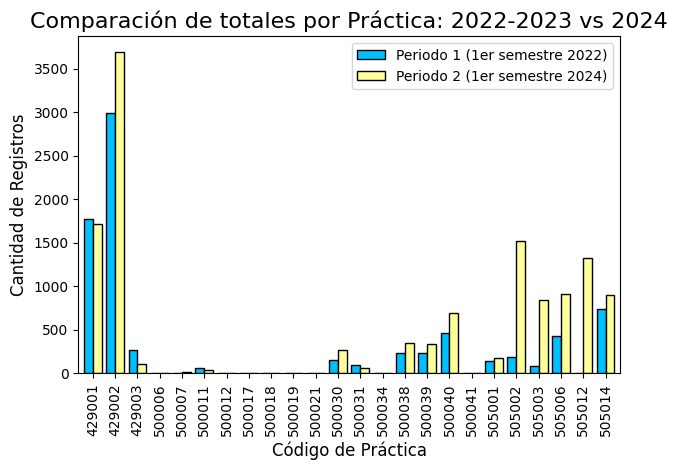

In [14]:
#DF UNICO
conteos_comparados = pd.DataFrame({
    'Periodo 1 (1er semestre 2022)': conteo_por_practica_groupby,
    'Periodo 2 (1er semestre 2024)': conteo_por_practica_groupby2
})


plt.figure(figsize=(10, 6))

conteos_comparados[['Periodo 1 (1er semestre 2022)', 'Periodo 2 (1er semestre 2024)']].plot(
    kind='bar',
    width=0.8,
    color=['#00bfff', '#ffff99'],
    edgecolor='black'
)


plt.title('Comparación de totales por Práctica: 2022-2023 vs 2024', fontsize=16)
plt.xlabel('Código de Práctica', fontsize=12)
plt.ylabel('Cantidad de Registros', fontsize=12)

plt.xticks(rotation=90)



plt.tight_layout()
plt.show()

Cantidad de visitas por afiliado

In [15]:
conteo = append_data['APELLIDO_NOMBRE'].value_counts()
print(conteo)

APELLIDO_NOMBRE
VARGAS BETANCURT FELIX             35
MINERVINI IRMA MABEL               28
COROMINAS NORMA AZUCENA            24
GEREZ JOSÉ REYNALDO                24
CANNAS MARIA ELENA                 24
                                   ..
CRESPO ELSA NELIDA                  1
POLITO SILVIA SUSANA                1
ACUŃA MARTA SUSANA                  1
GARCIA CELSA VIRGINIA               1
GAVILAN BENITEZ TERESA DE JESUS     1
Name: count, Length: 5356, dtype: int64


Cantidad de visitas por afiliado según prácticas

In [16]:
valor_a_buscar = "GEREZ JOSÉ REYNALDO"

detalle_duplicados = append_data[append_data['APELLIDO_NOMBRE'] == valor_a_buscar]


detalle_duplicados = detalle_duplicados[['APELLIDO_NOMBRE', 'FECHA_TURNO', 'PRACTICA']]



print(detalle_duplicados.to_string(index=False))

    APELLIDO_NOMBRE FECHA_TURNO                                                           PRACTICA
GEREZ JOSÉ REYNALDO  2024-04-03                    429002 - CONSULTA DE SEGUIMIENTO OFTALMOLOGICO 
GEREZ JOSÉ REYNALDO  2024-05-03                    505014 - ECOGRAFIA Y/O ECOMETRIA OFTALMOLOGICA 
GEREZ JOSÉ REYNALDO  2024-03-05                   505012 - ANALIZADOR DEL ENDOTELIO CORNEAL (ADEC)
GEREZ JOSÉ REYNALDO  2024-03-05                                        505003 - TOPOGRAFIA CORNEAL
GEREZ JOSÉ REYNALDO  2024-03-05                    505014 - ECOGRAFIA Y/O ECOMETRIA OFTALMOLOGICA 
GEREZ JOSÉ REYNALDO  2024-03-05                                505002 - PAQUIMETRIA COMPUTARIZADA 
GEREZ JOSÉ REYNALDO  2024-03-05                                505002 - PAQUIMETRIA COMPUTARIZADA 
GEREZ JOSÉ REYNALDO  2024-03-05                    505014 - ECOGRAFIA Y/O ECOMETRIA OFTALMOLOGICA 
GEREZ JOSÉ REYNALDO  2024-03-05                                        505003 - TOPOGRAFIA CORNEAL
GEREZ JOSÉ